In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [50]:
!ls data/lab3

2018-2010_india_export.csv  googleplaystore.csv  pulsar_stars.csv


Я решил использовать три разных датасета для проведения лабораторной работы по предобработке данных, так как поиск одного датасета, в котором были бы как категориальные фичи, так и пропуски данных, оказался довольно сложным (на kaggle в большинстве всех популярных и даже всех новых датасетов не было пропусков)

## Загрузка и первичный анализ данных

In [10]:
data = pd.read_csv('data/lab3/2018-2010_india_export.csv')

data.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [11]:
data.dtypes

HSCode         int64
Commodity     object
value        float64
country       object
year           int64
dtype: object

In [12]:
data.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [14]:
print(f'Всего строк: {data.shape[0]}')

Всего строк: 137023


## Обработка пропусков в данных

### Удаление или заполнение нулями

In [18]:
# Удаление колонок

data_new_1 = data.dropna(axis='columns', how='any')

data.shape, data_new_1.shape

((137023, 5), (137023, 4))

In [20]:
# Удаление сток

data_new_2 = data.dropna(axis='rows', how='any')

data.shape, data_new_2.shape

((137023, 5), (122985, 5))

In [23]:
data[data['value'].isnull()].head()

,HSCode,Commodity,value,country,year
11,14,VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUC...,NaN,AFGHANISTAN TIS,2018
36,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,NaN,AFGHANISTAN TIS,2018
44,53,OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND...,NaN,AFGHANISTAN TIS,2018
57,66,"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT...",NaN,AFGHANISTAN TIS,2018
68,79,ZINC AND ARTICLES THEREOF.,NaN,AFGHANISTAN TIS,2018


In [25]:
# заполнение всех пропущенных значений нулями

data_new_3 = data.fillna(0)
data_new_3[data['value'].isnull()].head()

,HSCode,Commodity,value,country,year
11,14,VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUC...,0.0,AFGHANISTAN TIS,2018
36,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
44,53,OTHER VEGETABLE TEXTILE FIBRES; PAPER YARN AND...,0.0,AFGHANISTAN TIS,2018
57,66,"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT...",0.0,AFGHANISTAN TIS,2018
68,79,ZINC AND ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018


### Внедрение значений

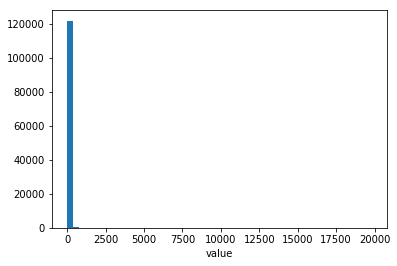

In [32]:
plt.hist(data['value'], 50);
plt.xlabel('value');

In [42]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка value. Тип данных float64. Количество пустых значений 14038, 10.24%.


In [43]:
data_num = data[num_cols]
data_num

,value
0,0.18
1,0.00
2,12.48
3,0.00
4,1.89
5,25.01
6,13.75
7,0.75
8,0.01
9,10.02


In [45]:
from sklearn.impute import SimpleImputer, MissingIndicator

data_values = data[['value']]

indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_values)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
strategies = ['mean', 'median', 'most_frequent']

def test_impute_strategy(strategy):
    imp = SimpleImputer(strategy=strategy)
    data_imp = imp.fit_transform(data_values)
    return data_imp[mask_missing_values_only]

In [47]:
strategies[0], test_impute_strategy(strategies[0])

('mean', array([21.56782917, 21.56782917, 21.56782917, ..., 21.56782917,
        21.56782917, 21.56782917]))

In [48]:
strategies[1], test_impute_strategy(strategies[1])

('median', array([0.36, 0.36, 0.36, ..., 0.36, 0.36, 0.36]))

In [49]:
strategies[2], test_impute_strategy(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

### Обработка пропусков в категориальных данных

In [57]:
data_2 = pd.read_csv('data/lab3/googleplaystore.csv')

data_2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [86]:
data_2.head()
data_2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [90]:
cat_data = data_2[['Current Ver']]

cat_col.head()

,Current Ver
0,1.0.0
1,2.0.0
2,1.2.4
3,Varies with device
4,1.1


In [92]:
cat_col['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [97]:
cat_col[cat_col['Current Ver'].isnull()].shape

(8, 1)

In [104]:
cat_imp_0 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

cat_col_0 = cat_imp_0.fit_transform(cat_col)
cat_col_0

array([['1.0.0'],
       ['2.0.0'],
       ['1.2.4'],
       ...,
       ['1.0'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [106]:
np.unique(cat_col_0)

array(['0.0.0.2', '0.0.1', '0.0.10', ..., 'v8.0.1.8.0629.1', 'v8[1.0.10]',
       'version 0.994'], dtype=object)

In [110]:
cat_imp_1 = SimpleImputer(missing_values=np.nan, strategy='constant',
                          fill_value='!!!')

cat_col_1 = cat_imp_1.fit_transform(cat_col)

cat_col_1

array([['1.0.0'],
       ['2.0.0'],
       ['1.2.4'],
       ...,
       ['1.0'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [111]:
np.unique(cat_col_1)

array(['!!!', '0.0.0.2', '0.0.1', ..., 'v8.0.1.8.0629.1', 'v8[1.0.10]',
       'version 0.994'], dtype=object)

## Преобразование категориальных признаков в числовые

### Использование подхода label encoding

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
column = np.array(list(map(lambda f: str(f), cat_col['Current Ver'])))
le.fit_transform(column)

array([ 118, 1018,  464, ...,  113, 2765, 2765])

In [139]:
le.inverse_transform([0, 1, 2, 3])

array(['0.0.0.2', '0.0.1', '0.0.10', '0.0.2'], dtype='<U50')

### Использование подхода one hot encoding

In [149]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

cat_enc_ohe = ohe.fit_transform(column.reshape(-1, 1))

cat_enc_ohe.shape

(10841, 2833)

In [150]:
cat_enc_ohe

<10841x2833 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [196]:
pd.get_dummies(cat_col.loc[10:15])

,Current Ver_1.0.15,Current Ver_1.0.4,Current Ver_1.2.3,Current Ver_3.8
10,0,1,0,0
11,1,0,0,0
12,0,0,0,1
13,0,1,0,0
14,0,0,1,0
15,0,0,0,0


## Масштабирование данных

In [198]:
data_3 = pd.read_csv('data/lab3/pulsar_stars.csv')

data_3.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


array([55.68378214, 58.88243001, 39.34164944, ..., 59.93593941,
       53.90239966, 85.79734025])

### MinMax масштабирование

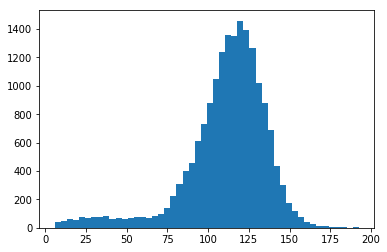

In [211]:
from sklearn.preprocessing import MinMaxScaler

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_3.iloc[:, 0].values[:, None])

plt.hist(data_3.iloc[:, 0].values[:, None], 50);

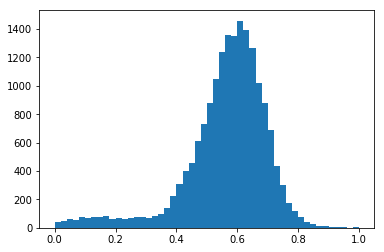

In [213]:
plt.hist(sc1_data, 50);

### Масштабирование данных на основе Z-оценки

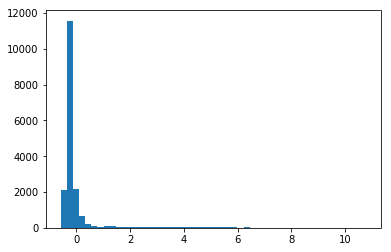

In [221]:
from sklearn.preprocessing import StandardScaler

sc2 = StandardScaler()

sc2_data = sc2.fit_transform(data_3[[data_3.columns[3]]])

plt.hist(sc2_data, 50);

### Нормализация данных

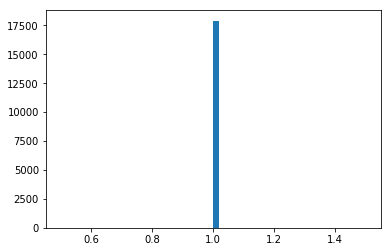

In [229]:
from sklearn.preprocessing import Normalizer

sc3 = Normalizer()
sc3_data = sc3.fit_transform(data_3[[data_3.columns[5]]])

plt.hist(sc3_data, 50);